In [2]:
import matplotlib.pyplot as plt
import pickle

import math
import numpy as np

from cointegration_analysis import estimate_long_run_short_run_relationships, engle_granger_two_step_cointegration_test
print("installs")

installs


In [3]:
def read_data(timestamps_pckl, stock_values_pckl):
    with open(timestamps_pckl, 'rb') as f:
        timestamps = pickle.load(f)
    with open(stock_values_pckl, 'rb') as f:
        stock_values = pickle.load(f)
    return timestamps, stock_values

# Data Loading & Exploration

In [4]:
# Load data into timestmaps and stock_values.
timestamps, stock_values = read_data('timestamps.pckl', 'stock_values.pckl')

# Create a new dictionary called log_stock_values with a similar structure to 
# stock_values, but containing the log of these instead.
log_stock_values = {name: [math.log(v) for v in stock_values[name]] for name in stock_values}

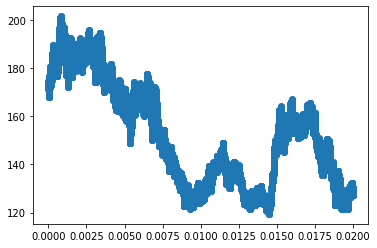

In [4]:
# Plot some of the stock values in this cell
plt.scatter(timestamps, stock_values['ASML'])
plt.show()

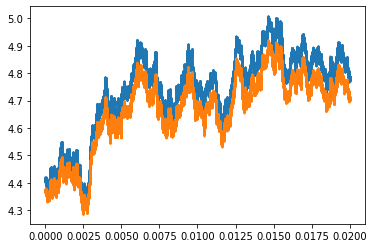

In [5]:
# Plot some of the log-stock values in this cell
plt.scatter(timestamps, log_stock_values['ALLIANZ'], s=1.)
plt.scatter(timestamps, [i - .8 for i in log_stock_values['LVMH']], s=1.)
plt.show()

# Analysis

In [6]:
# Use the built-in help() function to print the docstring for the cointegration_analysis-functions
help(estimate_long_run_short_run_relationships)

Help on function estimate_long_run_short_run_relationships in module cointegration_analysis:

estimate_long_run_short_run_relationships(y, x)
    Estimates long-run and short-run cointegration relationship for series y and x. 
    
    Uses a 2-step process to first estimate coefficients for the long-run relationship
        y_t = c + gamma * x_t + z_t
        
    and then the short-term relationship,
        y_t - y_(t-1) = alpha * z_(t-1) + epsilon_t,
        
    with z the found residuals of the first equation.
    
    Parameters
    ----------
    y : list of floats
        The first time series of the pair to analyse.
    
    x : list of floats
        The second time series of the pair to analyse.
    
    Returns
    -------
    c : float
        The constant term in the long-run relationship y_t = c + gamma * x_t + z_t. This 
        describes the static shift of y with respect to gamma * x.
        
    gamma : float
        The gamma term in the long-run relationship y_t 

In [7]:
help(engle_granger_two_step_cointegration_test)

Help on function engle_granger_two_step_cointegration_test in module cointegration_analysis:

engle_granger_two_step_cointegration_test(y, x)
    Applies the two-step Engle & Granger test for cointegration. 
    
    First fits the long-run relationship
        y_t = c + gamma * x_t + z_t
    
    and then tests, by Dickey-Fuller phi=1 vs phi < 1 in
        z_t = phi * z_(t-1) + eta_t
        
    If this implies phi < 1, the z series is stationary is concluded to be
    stationary, and thus the series y and x are concluded to be cointegrated.
    
    Parameters
    ----------
    y : list of floats
        the first time series of the pair to analyse
    
    x : list of floats
        the second time series of the pair to analyse
        
    Returns
    -------
    dfstat : float
        The Dickey Fuller test-statistic for phi = 1 vs phi < 1 in the second equation. A more 
        negative value implies the existence of stronger cointegration.
    
    pvalue : float
        The p

# Allianz and LVMH

In [10]:
dfstat, pvalue = engle_granger_two_step_cointegration_test(log_stock_values['ALLIANZ'], log_stock_values['LVMH'])
print(pvalue)

0.0


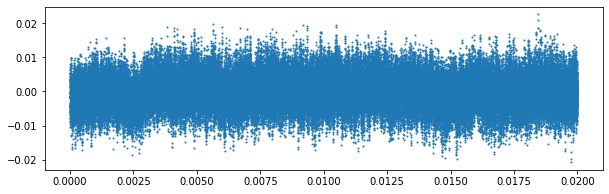

In [11]:
from pylab import rcParams
plt.rcParams['figure.figsize'] = 10, 3

c, gamma, alpha, z = estimate_long_run_short_run_relationships(log_stock_values['ALLIANZ'], log_stock_values['LVMH'])

plt.scatter(timestamps, z, s=1.)

plt.show()

# All stock pairs

In [21]:
stock_types = ['AIRBUS', 'ALLIANZ', 'ASML', 'LVMH', 'SAP', 'SIEMENS', 'TOTAL', 'UNILEVER']
for i in range(len(stock_types)):
    for j in range(i + 1, len(stock_types)):
        stock_y = stock_types[i]
        stock_x = stock_types[j]
        dfstat, pvalue = engle_granger_two_step_cointegration_test(
            log_stock_values[stock_y], log_stock_values[stock_x])
        if pvalue < .01:
            print(f"Found cointegration pairs {stock_y}, {stock_x} with pvalue {pvalue}")
            c, gamma, alpha, z = estimate_long_run_short_run_relationships(
                log_stock_values[stock_y], log_stock_values[stock_x])
            ratio = gamma*stock_values[stock_y][-1]/stock_values[stock_x][-1]
            print(f"ratio found, for each {stock_y}, trade opposite {stock_x} at ratio {ratio}")

Found cointegration pairs AIRBUS, SIEMENS with pvalue 0.0
ratio found, for each AIRBUS, trade opposite SIEMENS at ratio 0.7676079668575687
Found cointegration pairs ALLIANZ, LVMH with pvalue 0.0
ratio found, for each ALLIANZ, trade opposite LVMH at ratio 0.5303677967865916
Found cointegration pairs ASML, SAP with pvalue 0.0
ratio found, for each ASML, trade opposite SAP at ratio 2.032961997272251
Found cointegration pairs TOTAL, UNILEVER with pvalue 0.0
ratio found, for each TOTAL, trade opposite UNILEVER at ratio 0.3593291541391546


In [5]:
c, gamma, alpha, z = estimate_long_run_short_run_relationships(log_stock_values['ALLIANZ'], log_stock_values['LVMH'])
print(gamma)

1.0946104945929367
